## Trabajo Final - Grupo 6 :

- <a href='#1.0'> 1. Replicando Tabla 3 </a> 
- <a href='#1.1'> 2. Replicando Tabla 4 </a> 
- <a href='#1.2'> 3. Replicando Tabla 5 </a> 
- <a href='#1.3'> 4. Replicando Tabla 6 </a> 

In [5]:
# importamos las librerías 

import pandas as pd 
import numpy as np
import re 
from tqdm import tqdm 
import os

import statsmodels.api as sm  
import statsmodels.formula.api as smf  
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels.iv import IV2SLS 

import warnings
warnings.filterwarnings('ignore') 

from pystout import pystout

In [6]:
data = pd.read_stata(r"../../data/trabajo_final/replicacion/SerraPorterAEJ.dta",
                           convert_categoricals=False)
data

,anonid,took_fall,took_year,tookanother,numeconclass,econmajor,Major,Major_STEM,Major_Business,Major_Finance,...,ecojobs_b,ecojobs_c,ecojobs_d,ecojobs_e,ecojobs_f,ecojobs_g,ecojobs_h,major_current_a,major_current_b,survey_econmajor
0,4.0,0.0,0.0,0.0,0.0,0.0,Mathematics - BS,1.0,0.0,0.0,...,Entrepreneur,Journalist/ Correspondent,Working for marketplace on NPR,Business consultant,,,,Mathematics,,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,Biological Sciences - BS,1.0,0.0,0.0,...,Tax advisor,Managerial Position,,,,,,Biology,,0.0
2,7.0,1.0,1.0,1.0,13.0,1.0,Economics w/ Fina Appl - BS,0.0,0.0,0.0,...,,,,,,,,,,NaN
3,9.0,0.0,0.0,0.0,0.0,0.0,Journalism - BA,0.0,0.0,0.0,...,,,,,,,,Journalism,Communications,0.0
4,10.0,0.0,0.0,1.0,1.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,Investment Banker,,,,,,,Markets and Culture,Economics,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1386.0,0.0,0.0,0.0,0.0,0.0,Markets & Culture - BA,0.0,0.0,0.0,...,,,,,,,,,,NaN
623,1388.0,0.0,0.0,0.0,0.0,0.0,Economics w/ Fina Appl - PMJ,0.0,0.0,0.0,...,,,,,,,,Business,,0.0
624,1389.0,0.0,0.0,0.0,0.0,0.0,Accounting - BBA,0.0,1.0,0.0,...,Finance,Bank,Government,,,,,Economics,Public Relations,1.0
625,1393.0,0.0,1.0,1.0,10.0,1.0,Economics - BA,0.0,0.0,0.0,...,Professor,Economist,,,,,,Entrepreneurship,Finance Economics,0.0


In [7]:
#viendo las variables de la base completa:
data.describe()
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 0 to 626
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anonid            627 non-null    float32
 1   took_fall         627 non-null    float32
 2   took_year         627 non-null    float32
 3   tookanother       627 non-null    float32
 4   numeconclass      627 non-null    float32
 5   econmajor         627 non-null    float32
 6   Major             627 non-null    object 
 7   Major_STEM        627 non-null    float32
 8   Major_Business    627 non-null    float32
 9   Major_Finance     627 non-null    float32
 10  Major_Marketing   627 non-null    float32
 11  Major_SocSc       627 non-null    float32
 12  Major_Arts        627 non-null    float32
 13  Major_Comm        627 non-null    float32
 14  Major_Hum         627 non-null    float32
 15  female            627 non-null    float32
 16  greek             501 non-null    float64
 1

anonid              float32
took_fall           float32
took_year           float32
tookanother         float32
numeconclass        float32
econmajor           float32
Major                object
Major_STEM          float32
Major_Business      float32
Major_Finance       float32
Major_Marketing     float32
Major_SocSc         float32
Major_Arts          float32
Major_Comm          float32
Major_Hum           float32
female              float32
greek               float64
econ_hs             float32
varsity             float64
class_fe            float32
class_fe2           float32
yr_2016             float32
treatment_class     float32
treat2016           float32
female_prof         float32
instate             float32
freshman            float32
american            float32
ACumGPA             float64
gradePrinciples     float32
small_class         float32
grade3301           float32
fem2016             float32
femtreat16          float32
female_treat        float32
Testscore3301       

In [8]:
#las variables de interés son:
data[['american','instate','freshman','ACumGPA','greek','econ_hs','varsity']]

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
0,1.0,1.0,0.0,3.267,0.0,1.0,0.0
1,1.0,1.0,0.0,3.358,0.0,1.0,0.0
2,1.0,0.0,1.0,1.775,NaN,NaN,NaN
3,1.0,1.0,0.0,3.654,1.0,1.0,0.0
4,1.0,1.0,0.0,3.000,1.0,1.0,0.0
...,...,...,...,...,...,...,...
622,1.0,0.0,1.0,2.653,NaN,NaN,NaN
623,0.0,0.0,1.0,3.200,0.0,0.0,0.0
624,0.0,0.0,1.0,3.677,0.0,0.0,1.0
625,0.0,0.0,1.0,3.500,0.0,0.0,0.0


In [9]:
#contruyendo la primera tabla con las variables descriptivas:
table_1 = data.loc[:,['american','instate','freshman','ACumGPA','greek','econ_hs','varsity']]
table_1 

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
0,1.0,1.0,0.0,3.267,0.0,1.0,0.0
1,1.0,1.0,0.0,3.358,0.0,1.0,0.0
2,1.0,0.0,1.0,1.775,NaN,NaN,NaN
3,1.0,1.0,0.0,3.654,1.0,1.0,0.0
4,1.0,1.0,0.0,3.000,1.0,1.0,0.0
...,...,...,...,...,...,...,...
622,1.0,0.0,1.0,2.653,NaN,NaN,NaN
623,0.0,0.0,1.0,3.200,0.0,0.0,0.0
624,0.0,0.0,1.0,3.677,0.0,0.0,1.0
625,0.0,0.0,1.0,3.500,0.0,0.0,0.0


In [10]:
#estadísticas descriptivas de las variables de interés
table_1.describe()

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
count,627.000000,627.000000,627.000000,627.000000,501.000000,501.000000,500.000000
mean,0.902711,0.221691,0.864434,3.432091,0.642715,0.578842,0.072000
std,0.296587,0.415717,0.342602,0.435175,0.479679,0.494239,0.258747
min,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,3.229000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,3.500000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,3.740000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


In [11]:
#sin embargo, solo nos interesa "mean, sd, min, max, Observations"
estadistic_table_1 = table_1.describe().loc[["mean","std","min","max","count"]]
estadistic_table_1

,american,instate,freshman,ACumGPA,greek,econ_hs,varsity
mean,0.902711,0.221691,0.864434,3.432091,0.642715,0.578842,0.072000
std,0.296587,0.415717,0.342602,0.435175,0.479679,0.494239,0.258747
min,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000
count,627.000000,627.000000,627.000000,627.000000,501.000000,501.000000,500.000000


In [12]:
#Transponemos el DataFrame
_table_1 = table_1.describe().loc[["mean","std","min","max","count"]].T
_table_1

,mean,std,min,max,count
american,0.902711,0.296587,0.0,1.0,627.0
instate,0.221691,0.415717,0.0,1.0,627.0
freshman,0.864434,0.342602,0.0,1.0,627.0
ACumGPA,3.432091,0.435175,1.2,4.0,627.0
greek,0.642715,0.479679,0.0,1.0,501.0
econ_hs,0.578842,0.494239,0.0,1.0,501.0
varsity,0.072000,0.258747,0.0,1.0,500.0


In [13]:
# Obtener las columnas de la tabla1
columns = table_1.columns

# Definir los nuevos nombres de las columnas
new_names = ["American student", "In-state student", "Freshman", "Cumulative GPA",
             "Belongs to sorority", "Took econ in high school", "Athlete"]

# Crear un diccionario que mapee los nombres actuales de las columnas a los nuevos nombres
column_mapping = dict(zip(columns, new_names))

# Imprimir el diccionario resultante
print(column_mapping)


{'american': 'American student', 'instate': 'In-state student', 'freshman': 'Freshman', 'ACumGPA': 'Cumulative GPA', 'greek': 'Belongs to sorority', 'econ_hs': 'Took econ in high school', 'varsity': 'Athlete'}


In [14]:
# Personalizamos la tabla

index_names = dict(zip(table_1.columns, new_names))

columns_names= {
    "mean": "Mean",
    "std": "Standard Deviation",
    "min": "Min",
    "max": "Max",
    "count": "Observations",
}

# Renombramos las filas y las columnas
_table_1 = _table_1.rename(index=index_names, columns=columns_names)
_table_1

,Mean,Standard Deviation,Min,Max,Observations
American student,0.902711,0.296587,0.0,1.0,627.0
In-state student,0.221691,0.415717,0.0,1.0,627.0
Freshman,0.864434,0.342602,0.0,1.0,627.0
Cumulative GPA,3.432091,0.435175,1.2,4.0,627.0
Belongs to sorority,0.642715,0.479679,0.0,1.0,501.0
Took econ in high school,0.578842,0.494239,0.0,1.0,501.0
Athlete,0.072000,0.258747,0.0,1.0,500.0


In [15]:
# Personalizamos el formato de la tabla
text_table_1 = _table_1.style.format({
    "Mean": "{:.2f}",
    "Standard Deviation": "{:.2f}",
    "Min": "{:.2f}",
    "Max": "{:.2f}",
    "Observations": "{:.0f}"
})

# Guardamos la tabla formateada en formato LaTeX
latex_table_1 = text_table_1.to_latex(
    caption="Descriptive Statistics",
    column_format="lccccc"
)

# Guardamos la tabla formateada en un archivo
with open(r"..\..\output\tables\tabla_1.tex", "w") as file:
    file.write(latex_table_1)


## <a id='1.0'> 1. Replicando Tabla 3 </a> 

In [202]:
#Primera regresión de la Tabla 3
y_1 = data['took_year']

# agregamos la constante

X_1 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class"]])
X_1


#Variables Yi en la tabla 3
#– took year: dummy = 1 si la estudiante se matricula en cursos intermedios de
#Economía luego del curso Introductorio de Economía (Principios en Economía).


,const,treat2016,yr_2016,treatment_class
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
622,1.0,1.0,1.0,1.0
623,1.0,1.0,1.0,1.0
624,1.0,0.0,1.0,0.0
625,1.0,1.0,1.0,1.0


In [203]:
#Función Homocedástica
ols_1 = sm.OLS(y_1, X_1).fit()
ols_1.summary().tables[0]

Dep. Variable:,took_year,R-squared:,0.008
Model:,OLS,Adj. R-squared:,0.003
Method:,Least Squares,F-statistic:,1.679
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.170
Time:,23:13:23,Log-Likelihood:,-211.88
No. Observations:,627,AIC:,431.8
Df Residuals:,623,BIC:,449.5
Df Model:,3,,
Covariance Type:,nonrobust,,


In [204]:
ols_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.1474,0.027,5.411,0.000,0.094,0.201
treat2016,0.1150,0.055,2.101,0.036,0.007,0.222
yr_2016,-0.0401,0.037,-1.073,0.284,-0.113,0.033
treatment_class,-0.0377,0.038,-0.990,0.323,-0.112,0.037


In [205]:
ols_1.summary().tables[2]

Omnibus:,248.008,Durbin-Watson:,2.128
Prob(Omnibus):,0.000,Jarque-Bera (JB):,645.527
Skew:,2.124,Prob(JB):,6.69e-141
Kurtosis:,5.582,Cond. No.,6.63


In [206]:
#en resumen tenemos:
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.679
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.170
Time:                        23:13:23   Log-Likelihood:                -211.88
No. Observations:                 627   AIC:                             431.8
Df Residuals:                     623   BIC:                             449.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1474      0.027     

In [207]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_1_HW = sm.OLS(y_1, X_1).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_1_HW.summary())


                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.50
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000220
Time:                        23:13:23   Log-Likelihood:                -211.88
No. Observations:                 627   AIC:                             431.8
Df Residuals:                     623   BIC:                             449.5
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1474      0.014     

In [208]:
#Información importante de la tabla precedente
ols_1_HW .summary2()

ols_1_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.147436,0.014305,10.306614,6.577837e-25,0.119399,0.175473
treat2016,0.114951,0.037715,3.047907,2.304413e-03,0.041031,0.188870
yr_2016,-0.040091,0.026968,-1.486637,1.371107e-01,-0.092947,0.012765
treatment_class,-0.037680,0.025463,-1.479803,1.389257e-01,-0.087586,0.012226


In [209]:
#Segunda regresión de la Tabla 3 (con variables de control)
y_2 = data['took_year']

# agregamos la constante

X_2 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_2

,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [210]:
#Función Homecedástico
ols_2 = sm.OLS(y_2, X_2).fit()
ols_2.summary().tables[0]

Dep. Variable:,took_year,R-squared:,0.035
Model:,OLS,Adj. R-squared:,0.020
Method:,Least Squares,F-statistic:,2.250
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.0139
Time:,23:13:24,Log-Likelihood:,-203.16
No. Observations:,627,AIC:,428.3
Df Residuals:,616,BIC:,477.2
Df Model:,10,,
Covariance Type:,nonrobust,,


In [211]:
ols_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.3720,0.126,2.943,0.003,0.124,0.620
treat2016,0.1122,0.055,2.032,0.043,0.004,0.221
yr_2016,-0.0486,0.037,-1.304,0.193,-0.122,0.025
treatment_class,-0.0473,0.038,-1.237,0.217,-0.123,0.028
female_prof,0.0357,0.028,1.262,0.207,-0.020,0.091
instate,-0.0032,0.033,-0.097,0.923,-0.068,0.062
freshman,0.0149,0.041,0.363,0.717,-0.066,0.095
american,-0.1402,0.047,-2.971,0.003,-0.233,-0.048
ACumGPA,-0.0846,0.046,-1.836,0.067,-0.175,0.006
gradePrinciples,0.0600,0.023,2.622,0.009,0.015,0.105


In [212]:
ols_2.summary().tables[2]

Omnibus:,237.806,Durbin-Watson:,2.135
Prob(Omnibus):,0.000,Jarque-Bera (JB):,598.324
Skew:,2.045,Prob(JB):,1.19e-130
Kurtosis:,5.485,Cond. No.,49.5


In [213]:
#en resumen tenemos:
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.250
Date:                Sat, 15 Jul 2023   Prob (F-statistic):             0.0139
Time:                        23:13:24   Log-Likelihood:                -203.16
No. Observations:                 627   AIC:                             428.3
Df Residuals:                     616   BIC:                             477.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3720      0.126     

In [214]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_2_HW = sm.OLS(y_2, X_2).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_2_HW.summary())

                            OLS Regression Results                            
Dep. Variable:              took_year   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.67
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000114
Time:                        23:13:24   Log-Likelihood:                -203.16
No. Observations:                 627   AIC:                             428.3
Df Residuals:                     616   BIC:                             477.2
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3720      0.099     

In [215]:
#Información importante de la tabla precedente
ols_2_HW .summary2()
ols_2_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.372035,0.099016,3.757339,0.000172,0.177968,0.566102
treat2016,0.112200,0.041492,2.704171,0.006847,0.030878,0.193522
yr_2016,-0.048581,0.030175,-1.609987,0.107401,-0.107722,0.010560
treatment_class,-0.047340,0.016211,-2.920194,0.003498,-0.079114,-0.015567
female_prof,0.035724,0.033437,1.068403,0.285339,-0.029811,0.101259
instate,-0.003188,0.026918,-0.118448,0.905713,-0.055946,0.049569
freshman,0.014877,0.039367,0.377894,0.705509,-0.062281,0.092035
american,-0.140197,0.062318,-2.249692,0.024468,-0.262338,-0.018055
ACumGPA,-0.084611,0.045575,-1.856512,0.063381,-0.173936,0.004715
gradePrinciples,0.060041,0.021240,2.826751,0.004702,0.018411,0.101672


In [216]:
#Tercera regresión de la Tabla 3
y_3 = data['tookanother']

# agregamos la constante

X_3 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class"]])
X_3

#Variables Yi en la tabla 3
# tookanother: dummy = 1 si la estudiante se matricula en al menos un curso de
#econom´ıa luego del curso Introductorio de Economía (Principios en Economía).


,const,treat2016,yr_2016,treatment_class
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
622,1.0,1.0,1.0,1.0
623,1.0,1.0,1.0,1.0
624,1.0,0.0,1.0,0.0
625,1.0,1.0,1.0,1.0


In [217]:
#Función Homecedástico
ols_3 = sm.OLS(y_3, X_3).fit()
ols_3.summary().tables[0]

Dep. Variable:,tookanother,R-squared:,0.010
Model:,OLS,Adj. R-squared:,0.006
Method:,Least Squares,F-statistic:,2.160
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.0916
Time:,23:13:25,Log-Likelihood:,-330.66
No. Observations:,627,AIC:,669.3
Df Residuals:,623,BIC:,687.1
Df Model:,3,,
Covariance Type:,nonrobust,,


In [218]:
ols_3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.2372,0.033,7.202,0.000,0.173,0.302
treat2016,0.1576,0.066,2.384,0.017,0.028,0.287
yr_2016,-0.0620,0.045,-1.373,0.170,-0.151,0.027
treatment_class,-0.0482,0.046,-1.047,0.296,-0.138,0.042


In [219]:
ols_3.summary().tables[2]

Omnibus:,118.202,Durbin-Watson:,1.905
Prob(Omnibus):,0.000,Jarque-Bera (JB):,191.693
Skew:,1.353,Prob(JB):,2.37e-42
Kurtosis:,2.894,Cond. No.,6.63


In [220]:
print(ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.160
Date:                Sat, 15 Jul 2023   Prob (F-statistic):             0.0916
Time:                        23:13:25   Log-Likelihood:                -330.66
No. Observations:                 627   AIC:                             669.3
Df Residuals:                     623   BIC:                             687.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2372      0.033     

In [221]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_3_HW = sm.OLS(y_3, X_3).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_3_HW.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.04
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00176
Time:                        23:13:25   Log-Likelihood:                -330.66
No. Observations:                 627   AIC:                             669.3
Df Residuals:                     623   BIC:                             687.1
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2372      0.018     

In [222]:
#Información importante de la tabla precedente
ols_3_HW .summary2()
ols_3_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.237179,0.017854,13.284712,2.839481e-40,0.202187,0.272172
treat2016,0.157629,0.045657,3.452455,5.555095e-04,0.068143,0.247116
yr_2016,-0.062038,0.016320,-3.801441,1.438570e-04,-0.094024,-0.030052
treatment_class,-0.048155,0.019057,-2.526940,1.150613e-02,-0.085506,-0.010805


In [223]:
#Cuarta regresión de la Tabla 3 (con variables de control)
y_4 = data['tookanother']

# agregamos la constante

X_4 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_4

,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [224]:
#Función Homecedástico
ols_4 = sm.OLS(y_4, X_4).fit()
ols_4.summary().tables[0]

Dep. Variable:,tookanother,R-squared:,0.049
Model:,OLS,Adj. R-squared:,0.034
Method:,Least Squares,F-statistic:,3.172
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.000558
Time:,23:13:26,Log-Likelihood:,-318.16
No. Observations:,627,AIC:,658.3
Df Residuals:,616,BIC:,707.2
Df Model:,10,,
Covariance Type:,nonrobust,,


In [225]:
ols_4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.8032,0.152,5.290,0.000,0.505,1.101
treat2016,0.1389,0.066,2.093,0.037,0.009,0.269
yr_2016,-0.0668,0.045,-1.493,0.136,-0.155,0.021
treatment_class,-0.0615,0.046,-1.337,0.182,-0.152,0.029
female_prof,0.0231,0.034,0.678,0.498,-0.044,0.090
instate,-0.0192,0.040,-0.483,0.629,-0.097,0.059
freshman,-0.0154,0.049,-0.312,0.755,-0.112,0.081
american,-0.2090,0.057,-3.686,0.000,-0.320,-0.098
ACumGPA,-0.1370,0.055,-2.476,0.014,-0.246,-0.028
gradePrinciples,0.0420,0.028,1.526,0.128,-0.012,0.096


In [226]:
ols_4.summary().tables[2]

Omnibus:,110.999,Durbin-Watson:,1.928
Prob(Omnibus):,0.000,Jarque-Bera (JB):,174.915
Skew:,1.294,Prob(JB):,1.04e-38
Kurtosis:,2.986,Cond. No.,49.5


In [227]:
print(ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.172
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000558
Time:                        23:13:27   Log-Likelihood:                -318.16
No. Observations:                 627   AIC:                             658.3
Df Residuals:                     616   BIC:                             707.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8032      0.152     

In [228]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_4_HW = sm.OLS(y_4, X_4).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_4_HW.summary())

                            OLS Regression Results                            
Dep. Variable:            tookanother   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.235
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00281
Time:                        23:13:28   Log-Likelihood:                -318.16
No. Observations:                 627   AIC:                             658.3
Df Residuals:                     616   BIC:                             707.2
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8032      0.176     

In [229]:
#Información importante de la tabla precedente
ols_4_HW .summary2()
ols_4_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.803237,0.176235,4.557762,0.000005,0.457823,1.148652
treat2016,0.138852,0.051827,2.679130,0.007381,0.037272,0.240431
yr_2016,-0.066820,0.024627,-2.713289,0.006662,-0.115088,-0.018552
treatment_class,-0.061483,0.020246,-3.036734,0.002392,-0.101165,-0.021801
female_prof,0.023059,0.032106,0.718200,0.472634,-0.039868,0.085985
instate,-0.019153,0.045896,-0.417309,0.676452,-0.109108,0.070802
freshman,-0.015364,0.049604,-0.309735,0.756762,-0.112585,0.081857
american,-0.208994,0.076263,-2.740450,0.006136,-0.358466,-0.059522
ACumGPA,-0.137022,0.056266,-2.435246,0.014882,-0.247301,-0.026742
gradePrinciples,0.041975,0.026505,1.583689,0.113265,-0.009973,0.093923


In [230]:
# Lista de explicativas "y"
explicative  = ['treat2016', 'yr_2016', 'treatment_class', 'const']

# Etiquetas para las variables
explicative_label = ['Treatment class × 2016', 'Year 2016', 'Treatment class (in 2015)', 'Constant']

# Creamos un diccionario que mapee las explicativas con sus etiquetas
etiquetas = {explicative: explicative_label for explicative, explicative_label in zip(explicative, explicative_label)}

# Imprimimos el diccionario resultante
print(etiquetas)


{'treat2016': 'Treatment class × 2016', 'yr_2016': 'Year 2016', 'treatment_class': 'Treatment class (in 2015)', 'const': 'Constant'}


In [231]:
# Definimos los modelos que deseamos incluir en la tabla
models = [ols_1, ols_2, ols_3, ols_4]

# Definimos las etiquetas para las variables
labels = {
    'treat2016': 'Treatment class × 2016',
    'yr_2016': 'Year 2016',
    'treatment_class': 'Treatment class (in 2015)',
    'const': 'Constant'
}

# Definimos las etiquetas para las variables endógenas (dependent variables)
endog_names = [
    'Took Micro within year',
    'Took Micro within year',
    'Took another econ class',
    'Took another econ class'
]

# Crear la tabla resumen en formato LaTeX
tabla_latex = pystout(
    models=models,
    digits=3,
    endog_names=endog_names,
    exogvars=explicative, 
    varlabels=labels,
    modstat={'nobs': 'Observations'},
    addrows={'Controls': ['No', 'Yes', 'No', 'Yes']},
    addnotes=[
        'Notes: LPM regressions. We report wild bootstrap cluster p-values in parentheses and wild bootstrap cluster 95',
        'percent confidence intervals in square brackets, generated using boottest command in Stata 14 (Roodman et al.',
        '2019) for standard errors clustered at the class level (12 clusters). In columns 1 and 2, the dependent variable is a',
        'dummy equal to one if the student took Intermediate Micro the year after the Principles class. In columns 3 and 4,',
        'the dependent variable is a dummy equal to one if the student enrolled in another economics class at any time after',
        'the Principles class (up to January 2019).',
        '* Significantly different from zero at 90 percent confidence.',
        '** Significantly different from zero at 95 percent confidence.',
        '*** Significantly different from zero at 99 percent confidence.'
    ],
    title='Treatment Effects on Intermediate Outcomes',
    stars={0.1: '*', 0.05: '**', 0.01: '***'},
    file=r"..\..\output\tables\tabla3_grupo6.tex" 
)


## <a id='1.1'> 2. Replicando Tabla 4 </a> 

In [172]:
# Corremos la primera regresión 

y_1 = data['numeconclass']

# agregamos la constante

X_1 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class"]])
X_1

#Variables Yi en la tabla 4
#numeconclass: N´umero de clases de econom´ıa matriculados luego del curso Introductorio de Economía (Principios en Economía)


,const,treat2016,yr_2016,treatment_class
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
622,1.0,1.0,1.0,1.0
623,1.0,1.0,1.0,1.0
624,1.0,0.0,1.0,0.0
625,1.0,1.0,1.0,1.0


In [173]:
#Función Homecedástico
ols_1 = sm.OLS(y_1, X_1).fit()
ols_1.summary().tables[0]

Dep. Variable:,numeconclass,R-squared:,0.006
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,1.290
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.277
Time:,23:12:27,Log-Likelihood:,-1505.4
No. Observations:,627,AIC:,3019.
Df Residuals:,623,BIC:,3037.
Df Model:,3,,
Covariance Type:,nonrobust,,


In [174]:
ols_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.0256,0.214,4.783,0.000,0.605,1.447
treat2016,0.6916,0.431,1.606,0.109,-0.154,1.537
yr_2016,-0.1725,0.294,-0.587,0.558,-0.750,0.405
treatment_class,-0.1293,0.300,-0.432,0.666,-0.718,0.459


In [175]:
ols_1.summary().tables[2]

Omnibus:,386.942,Durbin-Watson:,2.084
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2357.666
Skew:,2.900,Prob(JB):,0.00
Kurtosis:,10.523,Cond. No.,6.63


In [176]:
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:           numeconclass   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.290
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.277
Time:                        23:12:28   Log-Likelihood:                -1505.4
No. Observations:                 627   AIC:                             3019.
Df Residuals:                     623   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0256      0.214     

In [177]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_1_HW = sm.OLS(y_1, X_1).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_1_HW.summary())

                            OLS Regression Results                            
Dep. Variable:           numeconclass   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.964
Date:                Sat, 15 Jul 2023   Prob (F-statistic):             0.0385
Time:                        23:12:28   Log-Likelihood:                -1505.4
No. Observations:                 627   AIC:                             3019.
Df Residuals:                     623   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0256      0.112     

In [178]:
#Información importante de la tabla precedente
ols_1_HW .summary2()
ols_1_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,1.025641,0.111581,9.191926,3.858698e-20,0.806947,1.244335
treat2016,0.691577,0.219834,3.145908,1.655720e-03,0.260711,1.122443
yr_2016,-0.172534,0.136918,-1.260121,2.076258e-01,-0.440889,0.095821
treatment_class,-0.129300,0.184649,-0.700246,4.837734e-01,-0.491204,0.232605


In [179]:
#Corremos la segunda regresión (incluye variable de control)

y_2 = data['numeconclass']

# agregamos la constante

X_2 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_2


,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [180]:
#Función Homecedástico
ols_2 = sm.OLS(y_2, X_2).fit()
ols_2.summary().tables[0]

Dep. Variable:,numeconclass,R-squared:,0.064
Model:,OLS,Adj. R-squared:,0.049
Method:,Least Squares,F-statistic:,4.210
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,1.14e-05
Time:,23:12:29,Log-Likelihood:,-1486.6
No. Observations:,627,AIC:,2995.
Df Residuals:,616,BIC:,3044.
Df Model:,10,,
Covariance Type:,nonrobust,,


In [181]:
ols_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.8037,0.979,5.929,0.000,3.881,7.726
treat2016,0.5220,0.428,1.220,0.223,-0.318,1.362
yr_2016,-0.1890,0.289,-0.655,0.513,-0.756,0.378
treatment_class,-0.2058,0.296,-0.694,0.488,-0.788,0.376
female_prof,0.0300,0.219,0.137,0.891,-0.400,0.460
instate,0.0103,0.255,0.040,0.968,-0.491,0.512
freshman,-0.1340,0.317,-0.422,0.673,-0.757,0.489
american,-1.6778,0.365,-4.591,0.000,-2.395,-0.960
ACumGPA,-1.2725,0.357,-3.566,0.000,-1.973,-0.572
gradePrinciples,0.4540,0.177,2.560,0.011,0.106,0.802


In [182]:
ols_2.summary().tables[2]

Omnibus:,352.556,Durbin-Watson:,2.126
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1868.524
Skew:,2.635,Prob(JB):,0.00
Kurtosis:,9.614,Cond. No.,49.5


In [183]:
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:           numeconclass   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.210
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.14e-05
Time:                        23:12:29   Log-Likelihood:                -1486.6
No. Observations:                 627   AIC:                             2995.
Df Residuals:                     616   BIC:                             3044.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.8037      0.979     

In [184]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_2_HW = sm.OLS(y_2, X_2).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_2_HW.summary())

                            OLS Regression Results                            
Dep. Variable:           numeconclass   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     30.57
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.37e-06
Time:                        23:12:29   Log-Likelihood:                -1486.6
No. Observations:                 627   AIC:                             2995.
Df Residuals:                     616   BIC:                             3044.
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.8037      1.266     

In [185]:
#Información importante de la tabla precedente
ols_2_HW .summary2()
ols_2_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,5.803738,1.265736,4.585269,0.000005,3.322941,8.284534
treat2016,0.521970,0.256480,2.035125,0.041838,0.019277,1.024662
yr_2016,-0.189034,0.200753,-0.941626,0.346384,-0.582502,0.204434
treatment_class,-0.205805,0.195576,-1.052302,0.292661,-0.589127,0.177517
female_prof,0.029999,0.268964,0.111534,0.911193,-0.497160,0.557158
instate,0.010312,0.188042,0.054838,0.956267,-0.358244,0.378867
freshman,-0.134035,0.376376,-0.356121,0.721750,-0.871718,0.603647
american,-1.677753,0.461450,-3.635828,0.000277,-2.582178,-0.773327
ACumGPA,-1.272544,0.426371,-2.984595,0.002840,-2.108216,-0.436873
gradePrinciples,0.454016,0.195497,2.322368,0.020213,0.070849,0.837182


In [186]:
# Corremos la tercera regresión

y_3 = data['econmajor']

# agregamos la constante

X_3 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class"]])
X_3
#Variables Yi en la tabla 4
#econmajor: dummy = 1 si la estudiantes se grad´ua en Economía (Economics Major).

,const,treat2016,yr_2016,treatment_class
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
622,1.0,1.0,1.0,1.0
623,1.0,1.0,1.0,1.0
624,1.0,0.0,1.0,0.0
625,1.0,1.0,1.0,1.0


In [187]:
#Función Homecedástico
ols_3 = sm.OLS(y_3, X_3).fit()
ols_3.summary().tables[0]

Dep. Variable:,econmajor,R-squared:,0.009
Model:,OLS,Adj. R-squared:,0.005
Method:,Least Squares,F-statistic:,1.944
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.121
Time:,23:12:30,Log-Likelihood:,-133.19
No. Observations:,627,AIC:,274.4
Df Residuals:,623,BIC:,292.1
Df Model:,3,,
Covariance Type:,nonrobust,,


In [188]:
ols_3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.1026,0.024,4.267,0.000,0.055,0.150
treat2016,0.0980,0.048,2.031,0.043,0.003,0.193
yr_2016,-0.0235,0.033,-0.712,0.477,-0.088,0.041
treatment_class,-0.0233,0.034,-0.694,0.488,-0.089,0.043


In [189]:
ols_3.summary().tables[2]

Omnibus:,333.730,Durbin-Watson:,2.090
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1367.152
Skew:,2.622,Prob(JB):,1.34e-297
Kurtosis:,7.983,Cond. No.,6.63


In [190]:
print(ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:              econmajor   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.944
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.121
Time:                        23:12:30   Log-Likelihood:                -133.19
No. Observations:                 627   AIC:                             274.4
Df Residuals:                     623   BIC:                             292.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1026      0.024     

In [191]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_3_HW = sm.OLS(y_3, X_3).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_3_HW.summary())

                            OLS Regression Results                            
Dep. Variable:              econmajor   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.719
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00770
Time:                        23:12:30   Log-Likelihood:                -133.19
No. Observations:                 627   AIC:                             274.4
Df Residuals:                     623   BIC:                             292.1
Df Model:                           3                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1026      0.011     

In [192]:
#Información importante de la tabla precedente
ols_3_HW .summary2()
ols_3_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.102564,0.011126,9.218474,3.013589e-20,0.080758,0.124371
treat2016,0.098046,0.028742,3.411207,6.467599e-04,0.041712,0.154380
yr_2016,-0.023468,0.022245,-1.054976,2.914365e-01,-0.067068,0.020132
treatment_class,-0.023296,0.025625,-0.909120,3.632867e-01,-0.073519,0.026927


In [193]:
# Corremos la cuarta regresión (incluye variable de control)

y_4 = data['econmajor']

# agregamos la constante

X_4 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_4

#Variables Yi en la tabla 4
#econmajor: dummy = 1 si la estudiantes se gradúa en Economía (Economics Major).

,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [194]:
#Función Homecedástico
ols_4 = sm.OLS(y_4, X_4).fit()
ols_4.summary().tables[0]

Dep. Variable:,econmajor,R-squared:,0.055
Model:,OLS,Adj. R-squared:,0.040
Method:,Least Squares,F-statistic:,3.606
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.000112
Time:,23:12:31,Log-Likelihood:,-118.28
No. Observations:,627,AIC:,258.6
Df Residuals:,616,BIC:,307.4
Df Model:,10,,
Covariance Type:,nonrobust,,


In [195]:
ols_4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.5105,0.110,4.624,0.000,0.294,0.727
treat2016,0.0801,0.048,1.662,0.097,-0.015,0.175
yr_2016,-0.0277,0.033,-0.851,0.395,-0.092,0.036
treatment_class,-0.0301,0.033,-0.900,0.368,-0.096,0.036
female_prof,0.0209,0.025,0.844,0.399,-0.028,0.069
instate,0.0136,0.029,0.471,0.638,-0.043,0.070
freshman,0.0076,0.036,0.212,0.832,-0.063,0.078
american,-0.1912,0.041,-4.639,0.000,-0.272,-0.110
ACumGPA,-0.1099,0.040,-2.731,0.006,-0.189,-0.031
gradePrinciples,0.0455,0.020,2.277,0.023,0.006,0.085


In [196]:
ols_4.summary().tables[2]

Omnibus:,315.277,Durbin-Watson:,2.116
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1227.222
Skew:,2.467,Prob(JB):,3.25e-267
Kurtosis:,7.757,Cond. No.,49.5


In [197]:
print(ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:              econmajor   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000112
Time:                        23:12:32   Log-Likelihood:                -118.28
No. Observations:                 627   AIC:                             258.6
Df Residuals:                     616   BIC:                             307.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5105      0.110     

In [198]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_4_HW = sm.OLS(y_4, X_4).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_4_HW.summary())

                            OLS Regression Results                            
Dep. Variable:              econmajor   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     8.543
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000714
Time:                        23:12:33   Log-Likelihood:                -118.28
No. Observations:                 627   AIC:                             258.6
Df Residuals:                     616   BIC:                             307.4
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5105      0.158     

In [199]:
#Información importante de la tabla precedente
ols_4_HW .summary2()
ols_4_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.510487,0.158101,3.228875,0.001243,0.200616,0.820359
treat2016,0.080141,0.036483,2.196653,0.028045,0.008635,0.151647
yr_2016,-0.027713,0.030071,-0.921573,0.356751,-0.086652,0.031226
treatment_class,-0.030105,0.024313,-1.238195,0.215644,-0.077758,0.017549
female_prof,0.020855,0.034479,0.604867,0.545267,-0.046722,0.088432
instate,0.013581,0.030251,0.448952,0.653466,-0.045710,0.072873
freshman,0.007603,0.029770,0.255381,0.798429,-0.050745,0.065950
american,-0.191195,0.060462,-3.162256,0.001566,-0.309698,-0.072693
ACumGPA,-0.109900,0.039162,-2.806300,0.005011,-0.186656,-0.033144
gradePrinciples,0.045543,0.019751,2.305898,0.021116,0.006832,0.084254


In [200]:
# Lista de explicativas "y"
explicative  = ['treat2016', 'yr_2016', 'treatment_class', 'const']

# Etiquetas para las variables
explicative_label = ['Treatment class × 2016', 'Year 2016', 'Treatment class (in 2015)', 'Constant']

# Creamos un diccionario que mapee las explicativas con sus etiquetas
etiquetas = {explicative: explicative_label for explicative, explicative_label in zip(explicative, explicative_label)}

# Imprimimos el diccionario resultante
print(etiquetas)

{'treat2016': 'Treatment class × 2016', 'yr_2016': 'Year 2016', 'treatment_class': 'Treatment class (in 2015)', 'const': 'Constant'}


In [201]:
# Definimos los modelos que deseamos incluir en la tabla
models = [ols_1, ols_2, ols_3, ols_4]

# Definimos las etiquetas para las variables
labels = {
    'treat2016': 'Treatment class × 2016',
    'yr_2016': 'Year 2016',
    'treatment_class': 'Treatment class (in 2015)',
    'const': 'Constant'
}

# Definimos las etiquetas para las variables endógenas (dependent variables)
endog_names = [
    'Number of econ classes taken',
    ' Number of econ classes taken',
    'Major in economics',
    'Major in economics'
]

# Crear la tabla resumen en formato LaTeX
tabla_latex = pystout(
    models=models,
    digits=3,
    endog_names=endog_names,
    exogvars=explicative, 
    varlabels=labels,
    modstat={'nobs': 'Observations'},
    addrows={'Controls': ['No', 'Yes', 'No', 'Yes']},
    addnotes=['Notes: Columns 1–2, OLS regressions; columns 3–4, LPM regressions. We report wild bootstrap cluster p-values\
                  in parentheses and wild bootstrap cluster 95 percent confidence intervals in square brackets, generated using\
                  boottest command in Stata 14 (Roodman et al. 2019) for standard errors clustered at the class level (12 clusters).\
                  In columns 1 and 2, the dependent variable is the number of economics classes taken after the Principles class. In\
                  columns 3 and 4, the dependent variable is a dummy equal to one if the student majored in economics (or declared\
                  the economics major, if the student has not graduated yet).', 
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
    title='Treatment Effects on Intermediate Outcomes',
    stars={0.1: '*', 0.05: '**', 0.01: '***'},
    file=r"..\..\output\tables\tabla4_grupo6.tex" 
)


## <a id='1.2'> 3. Replicando Tabla 5 </a> 

In [142]:
# Corremos la primera regresión (Incluye las varieables de control)

y_1 = data['Major_STEM']

# agregamos la constante

X_1 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_1

#Variables Yi en la tabla 5
#Major STEM: dummy = 1 si Major en carreras de ingeneirias y ciencias


,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [143]:
#Función Homecedástico
ols_1 = sm.OLS(y_1, X_1).fit()
ols_1.summary().tables[0]

Dep. Variable:,Major_STEM,R-squared:,0.030
Model:,OLS,Adj. R-squared:,0.014
Method:,Least Squares,F-statistic:,1.909
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.0413
Time:,23:10:25,Log-Likelihood:,-159.54
No. Observations:,627,AIC:,341.1
Df Residuals:,616,BIC:,389.9
Df Model:,10,,
Covariance Type:,nonrobust,,


In [144]:
ols_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.2453,0.118,2.081,0.038,0.014,0.477
treat2016,0.0134,0.052,0.260,0.795,-0.088,0.115
yr_2016,0.0027,0.035,0.078,0.938,-0.066,0.071
treatment_class,-0.0051,0.036,-0.143,0.886,-0.075,0.065
female_prof,-0.0089,0.026,-0.337,0.736,-0.061,0.043
instate,0.0308,0.031,1.000,0.318,-0.030,0.091
freshman,-0.1419,0.038,-3.711,0.000,-0.217,-0.067
american,-0.0678,0.044,-1.539,0.124,-0.154,0.019
ACumGPA,0.0089,0.043,0.206,0.837,-0.076,0.093
gradePrinciples,0.0043,0.021,0.202,0.840,-0.038,0.046


In [145]:
ols_1.summary().tables[2]

Omnibus:,291.393,Durbin-Watson:,1.943
Prob(Omnibus):,0.000,Jarque-Bera (JB):,964.417
Skew:,2.351,Prob(JB):,3.80e-210
Kurtosis:,6.849,Cond. No.,49.5


In [146]:
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_STEM   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.909
Date:                Sat, 15 Jul 2023   Prob (F-statistic):             0.0413
Time:                        23:10:26   Log-Likelihood:                -159.54
No. Observations:                 627   AIC:                             341.1
Df Residuals:                     616   BIC:                             389.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2453      0.118     

In [147]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_1_HW = sm.OLS(y_1, X_1).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_1_HW.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_STEM   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.932
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00179
Time:                        23:10:27   Log-Likelihood:                -159.54
No. Observations:                 627   AIC:                             341.1
Df Residuals:                     616   BIC:                             389.9
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2453      0.142     

In [148]:
#Información importante de la tabla precedente
ols_1_HW .summary2()
ols_1_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.245338,0.141994,1.727805,0.084023,-0.032965,0.523641
treat2016,0.013382,0.073542,0.181963,0.855612,-0.130758,0.157521
yr_2016,0.002709,0.044491,0.060882,0.951453,-0.084491,0.089909
treatment_class,-0.005120,0.037748,-0.135637,0.892108,-0.079105,0.068865
female_prof,-0.008902,0.023791,-0.374175,0.708274,-0.055532,0.037728
instate,0.030764,0.034542,0.890615,0.373136,-0.036938,0.098465
freshman,-0.141861,0.049864,-2.844973,0.004442,-0.239592,-0.044130
american,-0.067750,0.054786,-1.236640,0.216221,-0.175128,0.039628
ACumGPA,0.008862,0.026603,0.333108,0.739053,-0.043279,0.061003
gradePrinciples,0.004322,0.022758,0.189914,0.849377,-0.040283,0.048927


In [149]:
#Corremos la segunda regresión (incluye las variables de control)

y_2 = data['Major_Business']

# agregamos la constante

X_2 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_2

,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [150]:
#Función Homecedástico
ols_2 = sm.OLS(y_2, X_2).fit()
ols_2.summary().tables[0]

Dep. Variable:,Major_Business,R-squared:,0.022
Model:,OLS,Adj. R-squared:,0.007
Method:,Least Squares,F-statistic:,1.416
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.169
Time:,23:10:29,Log-Likelihood:,-319.96
No. Observations:,627,AIC:,661.9
Df Residuals:,616,BIC:,710.8
Df Model:,10,,
Covariance Type:,nonrobust,,


In [151]:
ols_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.1535,0.152,-1.008,0.314,-0.453,0.146
treat2016,0.0258,0.067,0.388,0.698,-0.105,0.156
yr_2016,-0.0054,0.045,-0.121,0.904,-0.094,0.083
treatment_class,-0.0305,0.046,-0.660,0.509,-0.121,0.060
female_prof,0.0201,0.034,0.591,0.555,-0.047,0.087
instate,-0.0037,0.040,-0.094,0.925,-0.082,0.074
freshman,0.0243,0.049,0.491,0.623,-0.073,0.121
american,-0.0431,0.057,-0.758,0.449,-0.155,0.069
ACumGPA,0.0967,0.056,1.742,0.082,-0.012,0.206
gradePrinciples,0.0137,0.028,0.495,0.621,-0.041,0.068


In [152]:
ols_2.summary().tables[2]

Omnibus:,119.613,Durbin-Watson:,1.994
Prob(Omnibus):,0.000,Jarque-Bera (JB):,195.271
Skew:,1.367,Prob(JB):,3.96e-43
Kurtosis:,2.986,Cond. No.,49.5


In [153]:
#en resumen tenemos:
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:         Major_Business   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.416
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.169
Time:                        23:10:29   Log-Likelihood:                -319.96
No. Observations:                 627   AIC:                             661.9
Df Residuals:                     616   BIC:                             710.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1535      0.152     

In [154]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_2_HW = sm.OLS(y_2, X_2).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_2_HW.summary())

                            OLS Regression Results                            
Dep. Variable:         Major_Business   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     78.36
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           9.36e-09
Time:                        23:10:29   Log-Likelihood:                -319.96
No. Observations:                 627   AIC:                             661.9
Df Residuals:                     616   BIC:                             710.8
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1535      0.214     

In [155]:
#Información importante de la tabla precedente
ols_2_HW .summary2()
ols_2_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-0.153540,0.213775,-0.718232,0.472614,-0.572530,0.265451
treat2016,0.025790,0.065987,0.390826,0.695926,-0.103543,0.155122
yr_2016,-0.005432,0.057206,-0.094949,0.924355,-0.117554,0.106690
treatment_class,-0.030461,0.034104,-0.893198,0.371751,-0.097304,0.036381
female_prof,0.020140,0.021379,0.942059,0.346162,-0.021761,0.062041
instate,-0.003742,0.021348,-0.175271,0.860867,-0.045582,0.038099
freshman,0.024265,0.029906,0.811362,0.417158,-0.034350,0.082880
american,-0.043097,0.067667,-0.636889,0.524197,-0.175723,0.089529
ACumGPA,0.096703,0.078957,1.224754,0.220668,-0.058050,0.251457
gradePrinciples,0.013653,0.035650,0.382968,0.701744,-0.056221,0.083526


In [156]:
# corremos la tercera regresión (incluye las variables de control)

y_3 = data['Major_Finance']

# agregamos la constante

X_3 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_3

#Variables Yi en la tabla 5
#Major Finance: dummy = 1 si Major en finanzas

,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [157]:
#Función Homecedástico
ols_3 = sm.OLS(y_3, X_3).fit()
ols_3.summary().tables[0]

Dep. Variable:,Major_Finance,R-squared:,0.052
Model:,OLS,Adj. R-squared:,0.036
Method:,Least Squares,F-statistic:,3.345
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.000297
Time:,23:10:30,Log-Likelihood:,-224.50
No. Observations:,627,AIC:,471.0
Df Residuals:,616,BIC:,519.8
Df Model:,10,,
Covariance Type:,nonrobust,,


In [158]:
ols_3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.3188,0.131,-2.438,0.015,-0.576,-0.062
treat2016,0.0782,0.057,1.368,0.172,-0.034,0.190
yr_2016,-0.0573,0.039,-1.485,0.138,-0.133,0.018
treatment_class,-0.0371,0.040,-0.937,0.349,-0.115,0.041
female_prof,0.0268,0.029,0.917,0.360,-0.031,0.084
instate,-0.0110,0.034,-0.323,0.747,-0.078,0.056
freshman,0.1323,0.042,3.119,0.002,0.049,0.216
american,0.0241,0.049,0.494,0.621,-0.072,0.120
ACumGPA,0.0726,0.048,1.522,0.128,-0.021,0.166
gradePrinciples,0.0346,0.024,1.462,0.144,-0.012,0.081


In [159]:
ols_3.summary().tables[2]

Omnibus:,194.256,Durbin-Watson:,1.946
Prob(Omnibus):,0.000,Jarque-Bera (JB):,402.931
Skew:,1.802,Prob(JB):,3.20e-88
Kurtosis:,4.562,Cond. No.,49.5


In [160]:
print(ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:          Major_Finance   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.345
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           0.000297
Time:                        23:10:30   Log-Likelihood:                -224.50
No. Observations:                 627   AIC:                             471.0
Df Residuals:                     616   BIC:                             519.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3188      0.131     

In [161]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_3_HW = sm.OLS(y_3, X_3).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_3_HW.summary())

                            OLS Regression Results                            
Dep. Variable:          Major_Finance   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     61.41
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.46e-08
Time:                        23:10:31   Log-Likelihood:                -224.50
No. Observations:                 627   AIC:                             471.0
Df Residuals:                     616   BIC:                             519.8
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3188      0.149     

In [162]:
#Información importante de la tabla precedente
ols_3_HW .summary2()
ols_3_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-0.318832,0.148966,-2.140296,0.032331,-0.610800,-0.026863
treat2016,0.078167,0.050320,1.553417,0.120324,-0.020457,0.176792
yr_2016,-0.057253,0.031887,-1.795518,0.072571,-0.119750,0.005244
treatment_class,-0.037097,0.042704,-0.868698,0.385012,-0.120796,0.046602
female_prof,0.026838,0.031996,0.838790,0.401587,-0.035873,0.089549
instate,-0.011019,0.058677,-0.187788,0.851043,-0.126023,0.103986
freshman,0.132260,0.036688,3.605011,0.000312,0.060353,0.204166
american,0.024125,0.050455,0.478135,0.632554,-0.074766,0.123015
ACumGPA,0.072562,0.047255,1.535543,0.124651,-0.020056,0.165179
gradePrinciples,0.034650,0.020217,1.713912,0.086545,-0.004974,0.074274


In [163]:
#Corremos la cuarta regresión (incluye las variables de control)

y_4 = data['Major_Marketing']

# agregamos la constante

X_4 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_4

#Variables Yi en la tabla 5
#Major Marketing: dummy = 1 si Majos en marketing


,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [164]:
#Función Homecedástico
ols_4 = sm.OLS(y_4, X_4).fit()
ols_4.summary().tables[0]

Dep. Variable:,Major_Marketing,R-squared:,0.037
Model:,OLS,Adj. R-squared:,0.022
Method:,Least Squares,F-statistic:,2.389
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.00877
Time:,23:10:31,Log-Likelihood:,-199.30
No. Observations:,627,AIC:,420.6
Df Residuals:,616,BIC:,469.5
Df Model:,10,,
Covariance Type:,nonrobust,,


In [165]:
ols_4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.2548,0.126,-2.028,0.043,-0.501,-0.008
treat2016,-0.0176,0.055,-0.320,0.749,-0.125,0.090
yr_2016,0.0286,0.037,0.773,0.440,-0.044,0.101
treatment_class,0.0370,0.038,0.973,0.331,-0.038,0.112
female_prof,0.0519,0.028,1.847,0.065,-0.003,0.107
instate,-0.0600,0.033,-1.828,0.068,-0.124,0.004
freshman,0.0498,0.041,1.222,0.222,-0.030,0.130
american,0.1126,0.047,2.402,0.017,0.021,0.205
ACumGPA,0.0467,0.046,1.020,0.308,-0.043,0.137
gradePrinciples,0.0154,0.023,0.676,0.499,-0.029,0.060


In [166]:
ols_4.summary().tables[2]

Omnibus:,235.760,Durbin-Watson:,2.002
Prob(Omnibus):,0.000,Jarque-Bera (JB):,586.628
Skew:,2.035,Prob(JB):,4.12e-128
Kurtosis:,5.425,Cond. No.,49.5


In [167]:
print(ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:        Major_Marketing   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.389
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00877
Time:                        23:10:32   Log-Likelihood:                -199.30
No. Observations:                 627   AIC:                             420.6
Df Residuals:                     616   BIC:                             469.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2548      0.126     

In [168]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_4_HW = sm.OLS(y_4, X_4).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_4_HW.summary())

                            OLS Regression Results                            
Dep. Variable:        Major_Marketing   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     305.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           5.81e-12
Time:                        23:10:33   Log-Likelihood:                -199.30
No. Observations:                 627   AIC:                             420.6
Df Residuals:                     616   BIC:                             469.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2548      0.093     

In [169]:
#Información importante de la tabla precedente
ols_4_HW .summary2()
ols_4_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-0.254770,0.092501,-2.754245,0.005883,-0.436069,-0.073472
treat2016,-0.017572,0.066279,-0.265115,0.790921,-0.147476,0.112333
yr_2016,0.028631,0.029546,0.969032,0.332529,-0.029278,0.086539
treatment_class,0.037017,0.031266,1.183954,0.236431,-0.024263,0.098298
female_prof,0.051942,0.010999,4.722188,0.000002,0.030383,0.073500
instate,-0.059953,0.031808,-1.884841,0.059451,-0.122296,0.002390
freshman,0.049781,0.027173,1.831976,0.066955,-0.003478,0.103040
american,0.112642,0.036628,3.075316,0.002103,0.040853,0.184432
ACumGPA,0.046695,0.043153,1.082092,0.279212,-0.037883,0.131273
gradePrinciples,0.015380,0.015967,0.963233,0.335431,-0.015915,0.046676


In [170]:
# Lista de explicativas "y"
explicative  = ['treat2016', 'yr_2016', 'treatment_class', 'const']

# Etiquetas para las variables
explicative_label = ['Treatment class × 2016', 'Year 2016', 'Treatment class (in 2015)', 'Constant']

# Creamos un diccionario que mapee las explicativas con sus etiquetas
etiquetas = {explicative: explicative_label for explicative, explicative_label in zip(explicative, explicative_label)}

# Imprimimos el diccionario resultante
print(etiquetas)

{'treat2016': 'Treatment class × 2016', 'yr_2016': 'Year 2016', 'treatment_class': 'Treatment class (in 2015)', 'const': 'Constant'}


In [171]:
# Definimos los modelos que deseamos incluir en la tabla
models = [ols_1, ols_2, ols_3, ols_4]

# Definimos las etiquetas para las variables
labels = {
    'treat2016': 'Treatment class × 2016',
    'yr_2016': 'Year 2016',
    'treatment_class': 'Treatment class (in 2015)',
    'const': 'Constant'
}

# Definimos las etiquetas para las variables endógenas (dependent variables)
endog_names = ['Major STEM','Major finance','Major business','Major marketing']

# Crear la tabla resumen en formato LaTeX
tabla_latex = pystout(
    models=models,
    digits=3,
    endog_names=endog_names,
    exogvars=explicative, 
    varlabels=labels,
    modstat={'nobs': 'Observations'},
    addrows={'Controls': ['No', 'Yes', 'No', 'Yes']},
    addnotes=[
        'Notes: LPM regressions. We report wild bootstrap cluster p-values in parentheses and wild bootstrap cluster 95',
        'percent confidence intervals in square brackets, generated using boottest command in Stata 14 (Roodman et al.',
        '2019) for standard errors clustered at the class level (12 clusters). In columns 1 and 2, the dependent variable is a',
        'dummy equal to one if the student took Intermediate Micro the year after the Principles class. In columns 3 and 4,',
        'the dependent variable is a dummy equal to one if the student enrolled in another economics class at any time after',
        'the Principles class (up to January 2019).',
        '* Significantly different from zero at 90 percent confidence.',
        '** Significantly different from zero at 95 percent confidence.',
        '*** Significantly different from zero at 99 percent confidence.'
    ],
    title='Treatment Effects on Intermediate Outcomes',
    stars={0.1: '*', 0.05: '**', 0.01: '***'},
    file=r"..\..\output\tables\tabla5_grupo6.tex" 
)


## <a id='1.3'> 4. Replicando Tabla 6 </a> 

In [110]:
# Corremos la primera regresión (incluye variable de control)

y_1 = data['Major_SocSc']

# agregamos la constante

X_1 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_1

#Variables Yi en la tabla 6
#Major SocSc: dummy = 1 si Major en ciencias sociales


,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [111]:
#Función Homecedástico
ols_1 = sm.OLS(y_1, X_1).fit()
ols_1.summary().tables[0]

Dep. Variable:,Major_SocSc,R-squared:,0.078
Model:,OLS,Adj. R-squared:,0.063
Method:,Least Squares,F-statistic:,5.209
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,2.32e-07
Time:,20:48:52,Log-Likelihood:,-131.82
No. Observations:,627,AIC:,285.6
Df Residuals:,616,BIC:,334.5
Df Model:,10,,
Covariance Type:,nonrobust,,


In [112]:
ols_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.6238,0.113,5.530,0.000,0.402,0.845
treat2016,-0.0062,0.049,-0.126,0.899,-0.103,0.091
yr_2016,-0.0230,0.033,-0.691,0.490,-0.088,0.042
treatment_class,-0.0369,0.034,-1.080,0.281,-0.104,0.030
female_prof,-0.0359,0.025,-1.422,0.155,-0.086,0.014
instate,-0.0278,0.029,-0.946,0.345,-0.086,0.030
freshman,-0.0780,0.037,-2.132,0.033,-0.150,-0.006
american,0.0896,0.042,2.127,0.034,0.007,0.172
ACumGPA,-0.1105,0.041,-2.687,0.007,-0.191,-0.030
gradePrinciples,-0.0298,0.020,-1.458,0.145,-0.070,0.010


In [113]:
ols_1.summary().tables[2]

Omnibus:,277.055,Durbin-Watson:,2.028
Prob(Omnibus):,0.000,Jarque-Bera (JB):,890.075
Skew:,2.224,Prob(JB):,5.28e-194
Kurtosis:,6.780,Cond. No.,49.5


In [114]:
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:            Major_SocSc   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.209
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           2.32e-07
Time:                        20:48:53   Log-Likelihood:                -131.82
No. Observations:                 627   AIC:                             285.6
Df Residuals:                     616   BIC:                             334.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6238      0.113     

In [115]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_1_HW = sm.OLS(y_1, X_1).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_1_HW.summary())

                            OLS Regression Results                            
Dep. Variable:            Major_SocSc   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           9.97e-16
Time:                        20:48:53   Log-Likelihood:                -131.82
No. Observations:                 627   AIC:                             285.6
Df Residuals:                     616   BIC:                             334.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6238      0.156     

In [116]:
#Información importante de la tabla precedente
ols_1_HW .summary2()
ols_1_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.623808,0.156118,3.995743,0.000064,0.317822,0.929794
treat2016,-0.006233,0.052829,-0.117985,0.906080,-0.109777,0.097310
yr_2016,-0.022985,0.036207,-0.634830,0.525539,-0.093949,0.047979
treatment_class,-0.036883,0.034723,-1.062205,0.288143,-0.104939,0.031173
female_prof,-0.035925,0.017372,-2.067968,0.038643,-0.069974,-0.001876
instate,-0.027838,0.026167,-1.063846,0.287398,-0.079126,0.023449
freshman,-0.077988,0.037577,-2.075430,0.037947,-0.151638,-0.004339
american,0.089587,0.039048,2.294275,0.021775,0.013054,0.166121
ACumGPA,-0.110507,0.045896,-2.407754,0.016051,-0.200461,-0.020552
gradePrinciples,-0.029807,0.025160,-1.184698,0.236137,-0.079120,0.019506


In [117]:
# Corremos la segunda regresión (incluye variable de control)

y_2 = data['Major_Arts']

# agregamos la constante

X_2 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_2

#Variables Yi en la tabla 6
#Major Arts: dummy = 1 si Major en artes


,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [118]:
#Función Homecedástico
ols_2 = sm.OLS(y_2, X_2).fit()
ols_2.summary().tables[0]

Dep. Variable:,Major_Arts,R-squared:,0.022
Model:,OLS,Adj. R-squared:,0.006
Method:,Least Squares,F-statistic:,1.382
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.185
Time:,20:48:55,Log-Likelihood:,48.480
No. Observations:,627,AIC:,-74.96
Df Residuals:,616,BIC:,-26.11
Df Model:,10,,
Covariance Type:,nonrobust,,


In [119]:
ols_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.0503,0.085,0.595,0.552,-0.116,0.216
treat2016,-0.0312,0.037,-0.844,0.399,-0.104,0.041
yr_2016,0.0180,0.025,0.721,0.471,-0.031,0.067
treatment_class,0.0354,0.026,1.381,0.168,-0.015,0.086
female_prof,-0.0189,0.019,-0.999,0.318,-0.056,0.018
instate,0.0176,0.022,0.795,0.427,-0.026,0.061
freshman,-0.0082,0.027,-0.301,0.764,-0.062,0.046
american,-0.0048,0.032,-0.151,0.880,-0.067,0.057
ACumGPA,0.0368,0.031,1.194,0.233,-0.024,0.097
gradePrinciples,-0.0434,0.015,-2.834,0.005,-0.074,-0.013


In [120]:
ols_2.summary().tables[2]

Omnibus:,505.449,Durbin-Watson:,1.908
Prob(Omnibus):,0.000,Jarque-Bera (JB):,5863.446
Skew:,3.805,Prob(JB):,0.00
Kurtosis:,15.905,Cond. No.,49.5


In [121]:
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_Arts   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.382
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.185
Time:                        20:48:56   Log-Likelihood:                 48.480
No. Observations:                 627   AIC:                            -74.96
Df Residuals:                     616   BIC:                            -26.11
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0503      0.085     

In [122]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_2_HW = sm.OLS(y_2, X_2).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_2_HW.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_Arts   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.253
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00566
Time:                        20:48:56   Log-Likelihood:                 48.480
No. Observations:                 627   AIC:                            -74.96
Df Residuals:                     616   BIC:                            -26.11
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0503      0.070     

In [123]:
#Información importante de la tabla precedente
ols_2_HW .summary2()
ols_2_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.050333,0.070468,0.714271,0.475060,-0.087781,0.188447
treat2016,-0.031216,0.033842,-0.922409,0.356315,-0.097545,0.035113
yr_2016,0.017985,0.010117,1.777722,0.075450,-0.001844,0.037813
treatment_class,0.035390,0.018924,1.870086,0.061472,-0.001701,0.072480
female_prof,-0.018919,0.017256,-1.096329,0.272935,-0.052740,0.014903
instate,0.017564,0.017258,1.017744,0.308799,-0.016260,0.051388
freshman,-0.008248,0.037526,-0.219802,0.826025,-0.081798,0.065302
american,-0.004763,0.028609,-0.166476,0.867783,-0.060836,0.051310
ACumGPA,0.036836,0.026832,1.372814,0.169810,-0.015755,0.089426
gradePrinciples,-0.043440,0.016182,-2.684463,0.007265,-0.075156,-0.011724


In [124]:
# Corremos la tercera regresión (incluye las variables de control)

y_3 = data['Major_Comm']

# agregamos la constante

X_3 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_3

#Variables Yi en la tabla 6
# Major Comm: dummy = 1 si Major en comunicaciones

,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [125]:
#Función Homecedástico
ols_3 = sm.OLS(y_3, X_3).fit()
ols_3.summary().tables[0]

Dep. Variable:,Major_Comm,R-squared:,0.021
Model:,OLS,Adj. R-squared:,0.005
Method:,Least Squares,F-statistic:,1.336
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.207
Time:,20:48:58,Log-Likelihood:,31.395
No. Observations:,627,AIC:,-40.79
Df Residuals:,616,BIC:,8.060
Df Model:,10,,
Covariance Type:,nonrobust,,


In [126]:
ols_3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.1463,0.087,1.683,0.093,-0.024,0.317
treat2016,-0.0119,0.038,-0.314,0.754,-0.087,0.063
yr_2016,-0.0077,0.026,-0.302,0.763,-0.058,0.043
treatment_class,-0.0020,0.026,-0.074,0.941,-0.054,0.050
female_prof,-0.0268,0.019,-1.376,0.169,-0.065,0.011
instate,-0.0067,0.023,-0.295,0.768,-0.051,0.038
freshman,0.0417,0.028,1.480,0.140,-0.014,0.097
american,0.0553,0.032,1.704,0.089,-0.008,0.119
ACumGPA,-0.0427,0.032,-1.346,0.179,-0.105,0.020
gradePrinciples,-0.0003,0.016,-0.021,0.983,-0.031,0.031


In [127]:
ols_3.summary().tables[2]

Omnibus:,489.288,Durbin-Watson:,1.978
Prob(Omnibus):,0.000,Jarque-Bera (JB):,5127.813
Skew:,3.681,Prob(JB):,0.00
Kurtosis:,14.920,Cond. No.,49.5


In [128]:
print(ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_Comm   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.336
Date:                Sat, 15 Jul 2023   Prob (F-statistic):              0.207
Time:                        20:48:59   Log-Likelihood:                 31.395
No. Observations:                 627   AIC:                            -40.79
Df Residuals:                     616   BIC:                             8.060
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1463      0.087     

In [129]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_3_HW = sm.OLS(y_3, X_3).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_3_HW.summary())

                            OLS Regression Results                            
Dep. Variable:             Major_Comm   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.19
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.15e-05
Time:                        20:49:00   Log-Likelihood:                 31.395
No. Observations:                 627   AIC:                            -40.79
Df Residuals:                     616   BIC:                             8.060
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1463      0.073     

In [130]:
#Información importante de la tabla precedente
ols_3_HW .summary2()
ols_3_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.146326,0.072959,2.005591,0.044900,0.003329,0.289324
treat2016,-0.011924,0.022691,-0.525519,0.599222,-0.056397,0.032548
yr_2016,-0.007736,0.019598,-0.394745,0.693031,-0.046147,0.030675
treatment_class,-0.001954,0.016948,-0.115300,0.908207,-0.035171,0.031263
female_prof,-0.026786,0.015742,-1.701584,0.088833,-0.057639,0.004067
instate,-0.006701,0.022876,-0.292921,0.769583,-0.051537,0.038135
freshman,0.041711,0.026746,1.559495,0.118879,-0.010711,0.094133
american,0.055319,0.019444,2.845116,0.004440,0.017210,0.093428
ACumGPA,-0.042676,0.026262,-1.625042,0.104154,-0.094148,0.008796
gradePrinciples,-0.000331,0.011899,-0.027833,0.977795,-0.023653,0.022991


In [131]:
#Corremos la cuarta regresión (incluye las variables de control)

y_4 = data['Major_Hum']

# agregamos la constante

X_4 = sm.add_constant(data.loc[:,["treat2016", "yr_2016", "treatment_class", "female_prof", "instate", "freshman", "american", "ACumGPA",
"gradePrinciples", "small_class"]])
X_4

#Variables Yi en la tabla 6
# Major Hum: dummy = 1 si Major en humanidades

,const,treat2016,yr_2016,treatment_class,female_prof,instate,freshman,american,ACumGPA,gradePrinciples,small_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.267,4.00,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.358,3.00,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.775,1.67,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.654,3.00,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.000,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
622,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.653,2.33,0.0
623,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.200,0.33,0.0
624,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.677,3.67,1.0
625,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.500,3.00,0.0


In [132]:
#Función Homecedástico
ols_4 = sm.OLS(y_4, X_4).fit()
ols_4.summary().tables[0]

Dep. Variable:,Major_Hum,R-squared:,0.038
Model:,OLS,Adj. R-squared:,0.023
Method:,Least Squares,F-statistic:,2.445
Date:,"Sat, 15 Jul 2023",Prob (F-statistic):,0.00726
Time:,20:49:00,Log-Likelihood:,-69.809
No. Observations:,627,AIC:,161.6
Df Residuals:,616,BIC:,210.5
Df Model:,10,,
Covariance Type:,nonrobust,,


In [133]:
ols_4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.1404,0.102,1.374,0.170,-0.060,0.341
treat2016,-0.1413,0.045,-3.165,0.002,-0.229,-0.054
yr_2016,0.0671,0.030,2.227,0.026,0.008,0.126
treatment_class,0.0828,0.031,2.677,0.008,0.022,0.144
female_prof,-0.0449,0.023,-1.961,0.050,-0.090,6.14e-05
instate,0.0286,0.027,1.071,0.285,-0.024,0.081
freshman,-0.0073,0.033,-0.221,0.825,-0.072,0.058
american,0.0201,0.038,0.527,0.598,-0.055,0.095
ACumGPA,0.0069,0.037,0.186,0.852,-0.066,0.080
gradePrinciples,-0.0412,0.019,-2.225,0.026,-0.078,-0.005


In [134]:
print(ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:              Major_Hum   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.445
Date:                Sat, 15 Jul 2023   Prob (F-statistic):            0.00726
Time:                        20:49:02   Log-Likelihood:                -69.809
No. Observations:                 627   AIC:                             161.6
Df Residuals:                     616   BIC:                             210.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1404      0.102     

In [135]:
# Ajustamos el modelo de regresión lineal con error estándar robusto de Huber-White
ols_4_HW = sm.OLS(y_4, X_4).fit(cov_type='cluster', cov_kwds={'groups': data['class_fe2']})

# Imprimir el resumen del modelo
print(ols_4_HW.summary())

                            OLS Regression Results                            
Dep. Variable:              Major_Hum   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     18.66
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.71e-05
Time:                        20:49:02   Log-Likelihood:                -69.809
No. Observations:                 627   AIC:                             161.6
Df Residuals:                     616   BIC:                             210.5
Df Model:                          10                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1404      0.115     

In [136]:
#Información importante de la tabla precedente
ols_4_HW .summary2()
ols_4_HW .summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.140391,0.115125,1.219460,2.226695e-01,-0.085251,0.366032
treat2016,-0.141308,0.025930,-5.449597,5.048409e-08,-0.192129,-0.090486
yr_2016,0.067080,0.016810,3.990410,6.595910e-05,0.034132,0.100028
treatment_class,0.082833,0.026519,3.123478,1.787270e-03,0.030856,0.134810
female_prof,-0.044871,0.021133,-2.123328,3.372634e-02,-0.086291,-0.003452
instate,0.028551,0.016850,1.694430,9.018363e-02,-0.004474,0.061576
freshman,-0.007308,0.036285,-0.201412,8.403761e-01,-0.078426,0.063809
american,0.020115,0.026041,0.772425,4.398625e-01,-0.030925,0.071155
ACumGPA,0.006931,0.042076,0.164716,8.691674e-01,-0.075536,0.089397
gradePrinciples,-0.041182,0.017423,-2.363655,1.809568e-02,-0.075330,-0.007033


In [137]:
# Lista de explicativas "y"
explicative  = ['treat2016', 'yr_2016', 'treatment_class', 'const']

# Etiquetas para las variables
explicative_label = ['Treatment class × 2016', 'Year 2016', 'Treatment class (in 2015)', 'Constant']

# Creamos un diccionario que mapee las explicativas con sus etiquetas
etiquetas = {explicative: explicative_label for explicative, explicative_label in zip(explicative, explicative_label)}

# Imprimimos el diccionario resultante
print(etiquetas)


{'treat2016': 'Treatment class × 2016', 'yr_2016': 'Year 2016', 'treatment_class': 'Treatment class (in 2015)', 'const': 'Constant'}


In [138]:
# Definimos los modelos que deseamos incluir en la tabla
models = [ols_1, ols_2, ols_3, ols_4]

# Definimos las etiquetas para las variables
labels = {
    'treat2016': 'Treatment class × 2016',
    'yr_2016': 'Year 2016',
    'treatment_class': 'Treatment class (in 2015)',
    'const': 'Constant'
}

# Definimos las etiquetas para las variables endógenas (dependent variables)
endog_names = [ 'Major social sciences','Major arts','Major communication','Major humanities']

# Crear la tabla resumen en formato LaTeX
tabla_latex = pystout(
    models=models,
    digits=3,
    endog_names=endog_names,
    exogvars=explicative, 
    varlabels=labels,
    modstat={'nobs': 'Observations'},
    addrows={'Controls': ['No', 'Yes', 'No', 'Yes']},
    addnotes=[
        'Notes: LPM regressions. We report wild bootstrap cluster p-values in parentheses and wild bootstrap cluster 95',
        'percent confidence intervals in square brackets, generated using boottest command in Stata 14 (Roodman et al.',
        '2019) for standard errors clustered at the class level (12 clusters). In columns 1 and 2, the dependent variable is a',
        'dummy equal to one if the student took Intermediate Micro the year after the Principles class. In columns 3 and 4,',
        'the dependent variable is a dummy equal to one if the student enrolled in another economics class at any time after',
        'the Principles class (up to January 2019).',
        '* Significantly different from zero at 90 percent confidence.',
        '** Significantly different from zero at 95 percent confidence.',
        '*** Significantly different from zero at 99 percent confidence.'
    ],
    title='Treatment Effects on Intermediate Outcomes',
    stars={0.1: '*', 0.05: '**', 0.01: '***'},
    file=r"..\..\output\tables\tabla6_grupo6.tex" 
)


KeyError: 'Model'

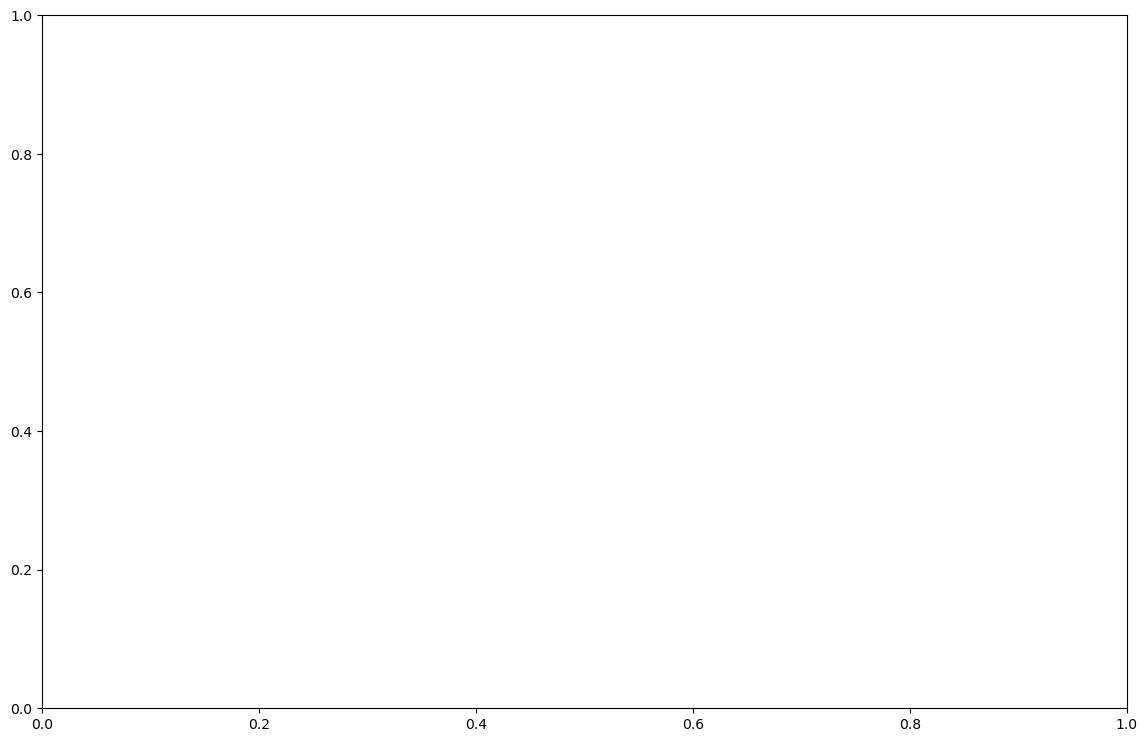

In [141]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 9))

# scatter plot ( para los points . coeficciente)

ax.scatter(x=_table_1['Model'], 
         marker='o', s=20,  # s: modificar tamaño del point
         y=_table_1['Estimate'], color = "darkblue")

# errorbar para graficar el itervalo de confianza 

eb1 = plt.errorbar(x=_table_1['Model'], y=_table_1['Estimate'],
            yerr = 0.5*(_table_1['Upper_bound']- _table_1['Lower_bound']),
            color = 'darkblue', ls='', capsize = 5)



plt.axhline(y=0, color = 'black').set_linestyle('--')  # linea horizontal 

# Set title & labels
plt.title('Treatment class x 2016 coefficient (95% CI)',fontsize=12)

# Guardar el gráfico en un archivo de imagen
plt.savefig(r"..\Trabajo_final\graph_treat2016.png")

